In [74]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


In [201]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

## Read and explore data

In [87]:
df = pd.read_csv('train.csv')

In [88]:
def df_info(df):
    
    '''input: dataframe. print descrptive statistics of this df, including columns with missing values'''
    
    print(f"Dataframe dimension is: {df.shape}")
    print("\n --------------------------------------------------  \n")
    print("Numeric info: \n" + f"{df.describe()}")
    print("\n --------------------------------------------------  \n")
    print("Column data types: \n" + f"{df.dtypes}")
    print("\n --------------------------------------------------  \n")
    
    col_with_miss = []
    for c in df:
        if df[c].isnull().any():
            col_with_miss.append(c)
            print("Missing values:" + f"{c}: {df[c].isnull().sum()}")
    
    if not col_with_miss:
        print("No missing value found")
        
    print("\n --------------------------------------------------  \n")
    
    
    print("\n --------------------------------------------------  \n")

In [89]:
df_info(df)

Dataframe dimension is: (1460, 81)

 --------------------------------------------------  

Numeric info: 
                Id   MSSubClass  LotFrontage        LotArea  OverallQual  OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1   BsmtFinSF2    BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  LowQualFinSF    GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath     HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd   Fireplaces  GarageYrBlt   GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch     PoolArea       MiscVal       MoSold       YrSold      SalePrice
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000   1460.000000  1460.000000   1460.000000   1460.000000  1460.000000  1460.000000   1460.000000   1460.000000   1460.000000  1460.000000  1379.000000  1460.000000  1460.000000  

In [31]:
def plot_data(data):
    
    '''plot box plot for numeric, bar plot (count plot) for categorical'''
    
    # Separate categorical and numeric columns
    categorical_columns = data.select_dtypes(include=['object']).columns
    numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns
    
    # Draw bar plots for categorical columns
    for cat_col in categorical_columns:
        plt.figure(figsize=(8, 6))
        sns.countplot(data=data, x=cat_col)
        plt.title(f'Bar Plot of {cat_col}')
        plt.xticks(rotation=45)
        plt.show()

    # Draw box plots for numeric columns
    for num_col in numeric_columns:
        plt.figure(figsize=(8, 6))
        sns.boxplot(data=data, y=num_col)
        plt.title(f'Box Plot of {num_col}')
        plt.show()

# Example usage:
# Assuming 'data' is your DataFrame
# plot_categorical_numeric(data)


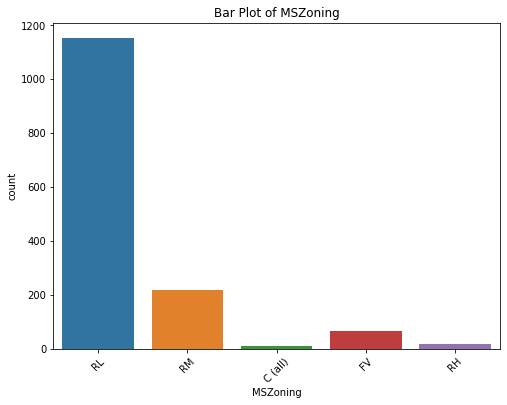

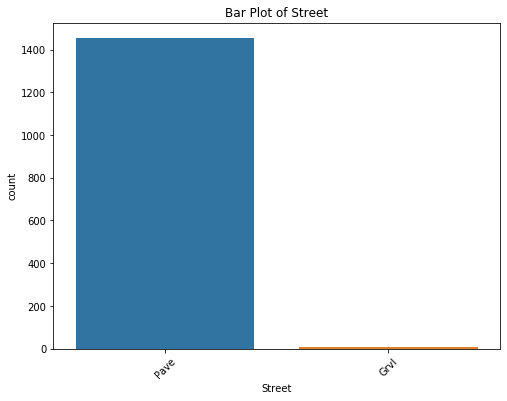

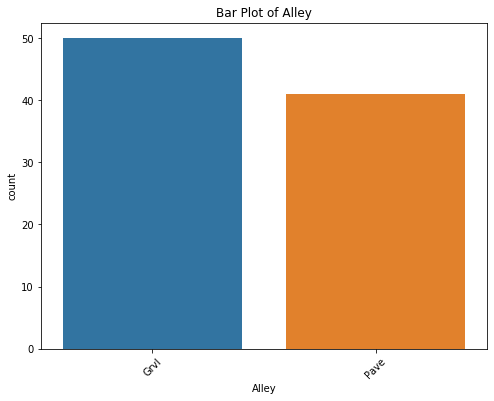

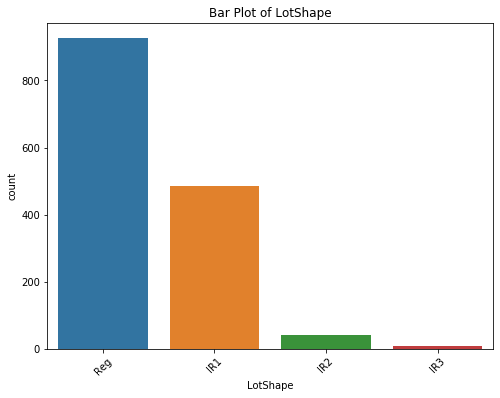

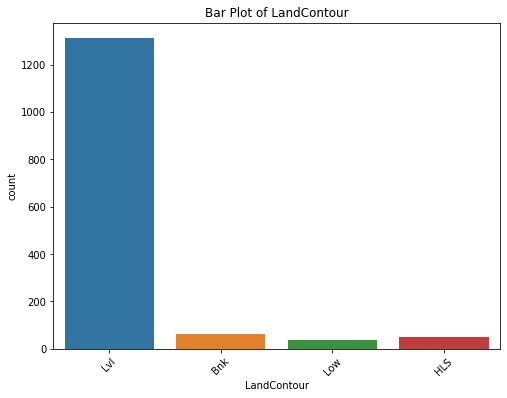

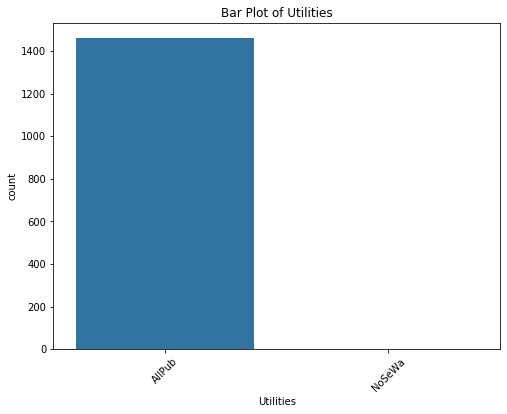

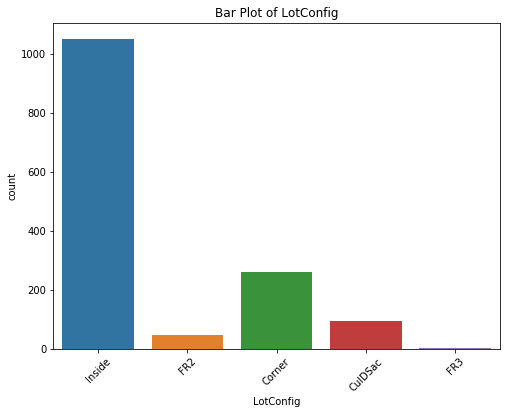

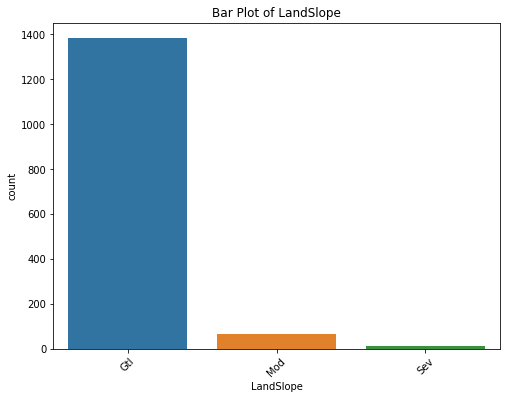

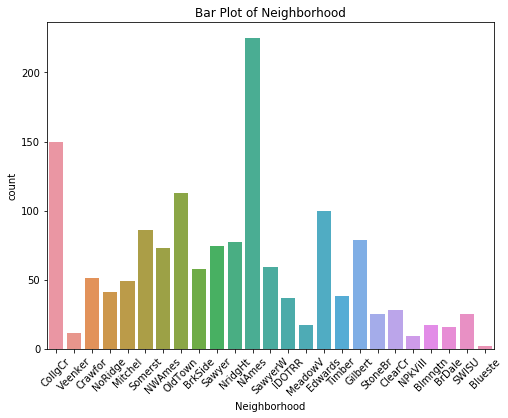

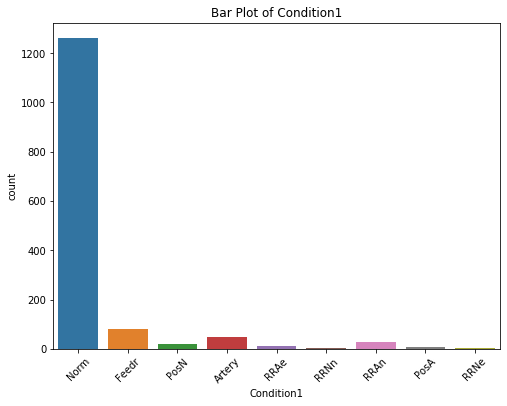

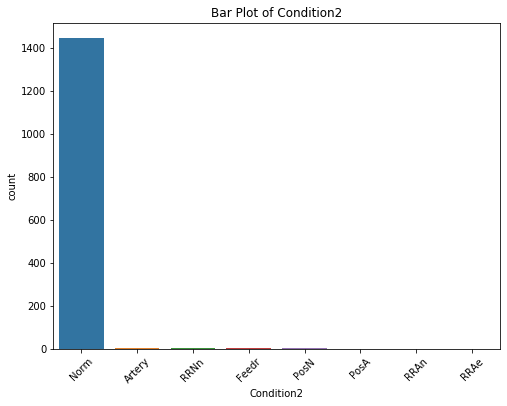

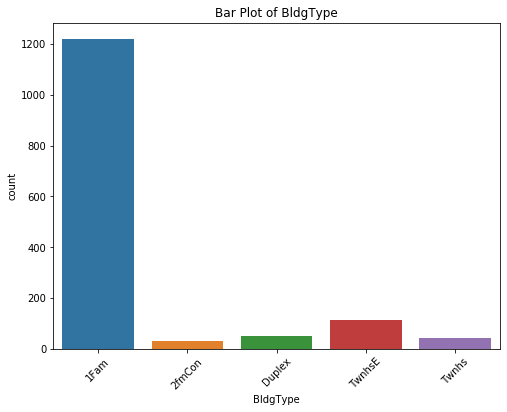

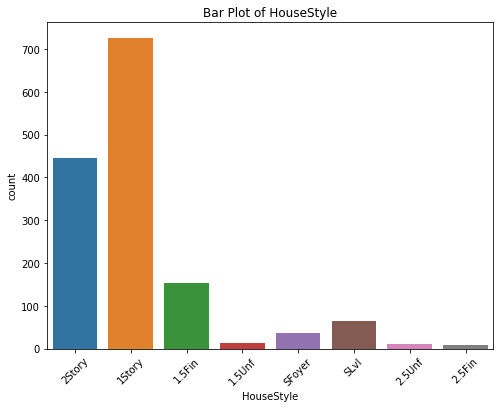

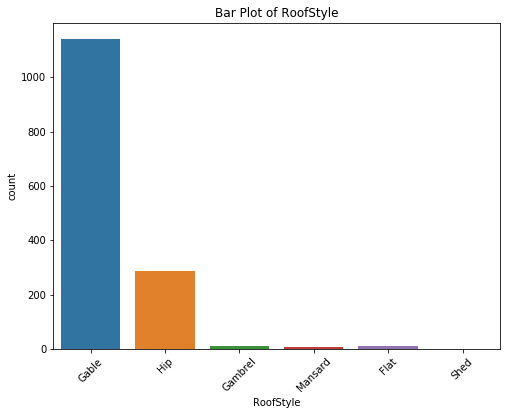

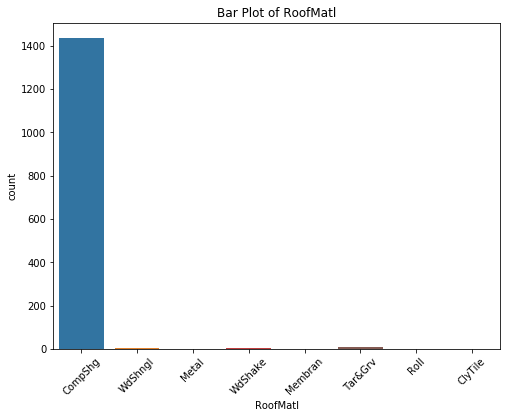

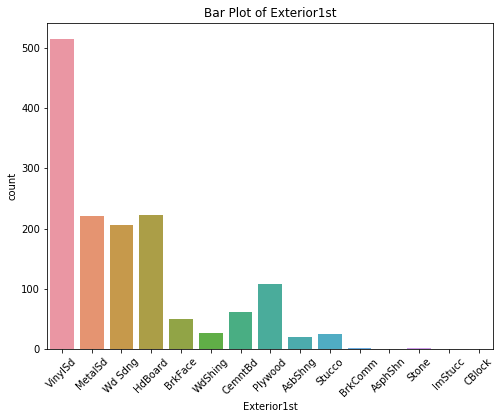

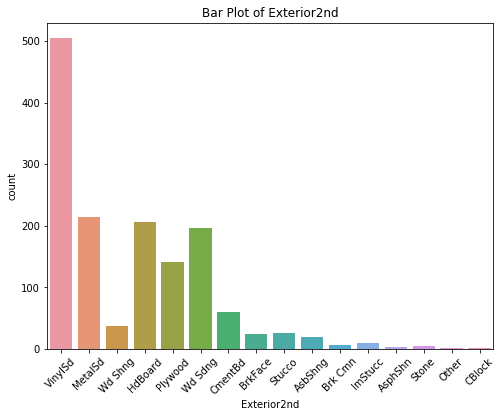

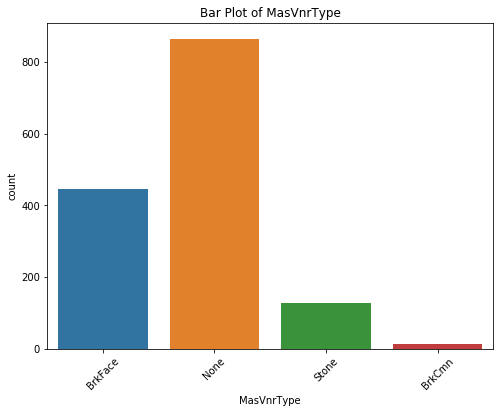

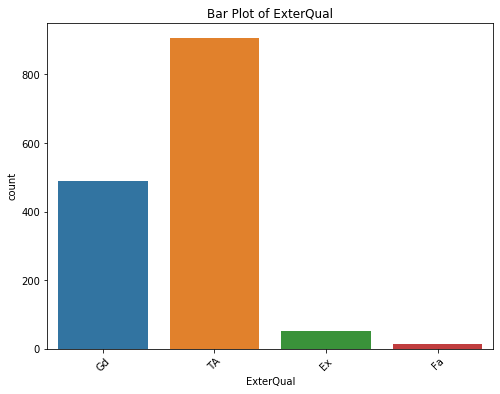

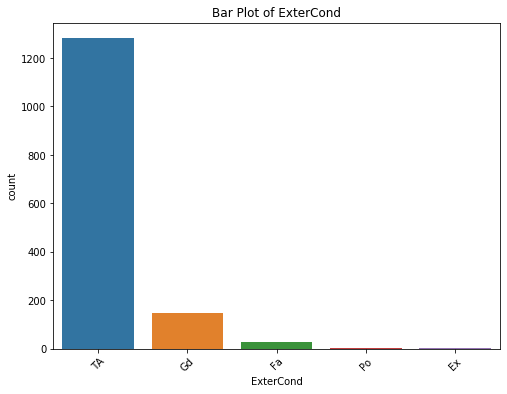

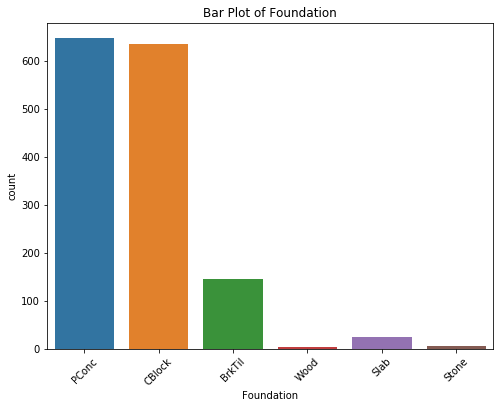

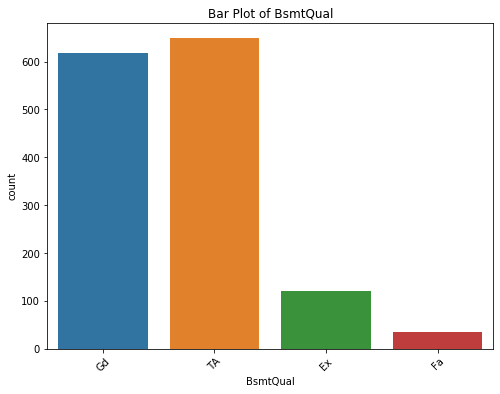

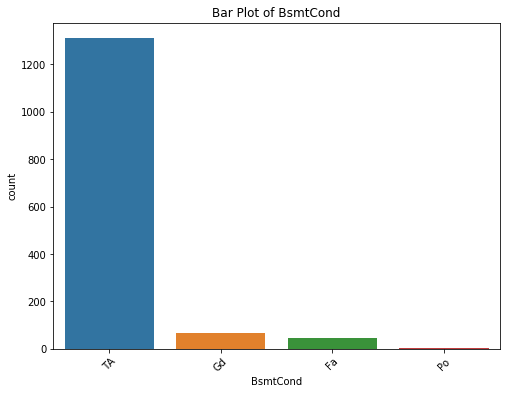

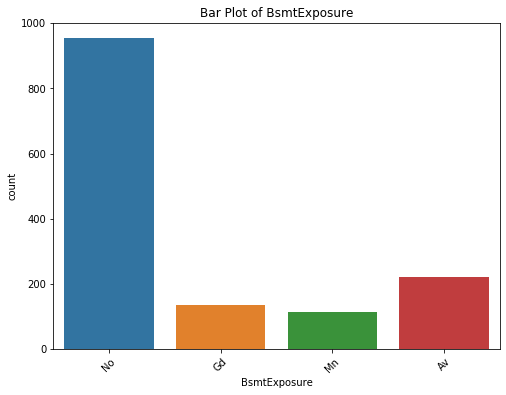

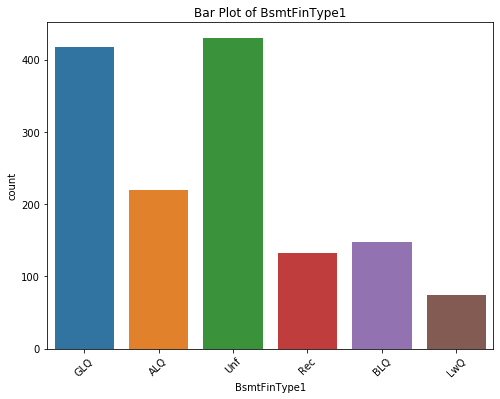

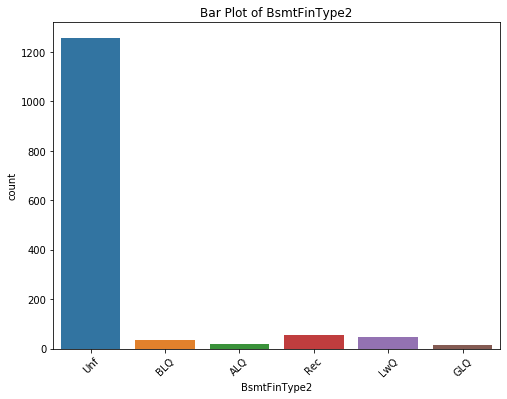

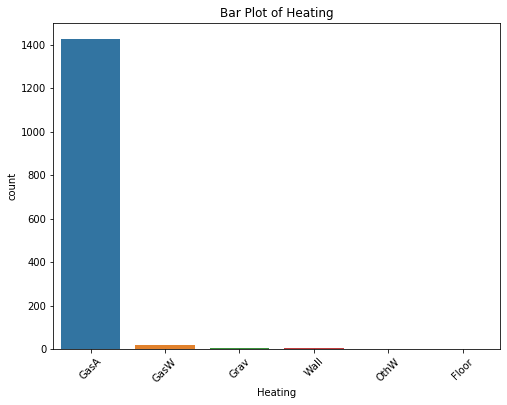

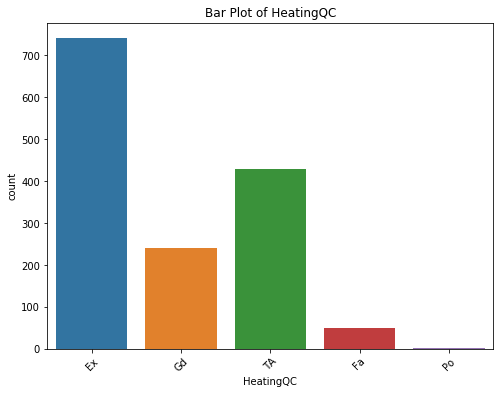

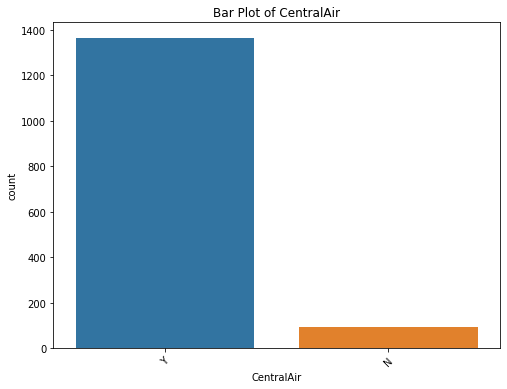

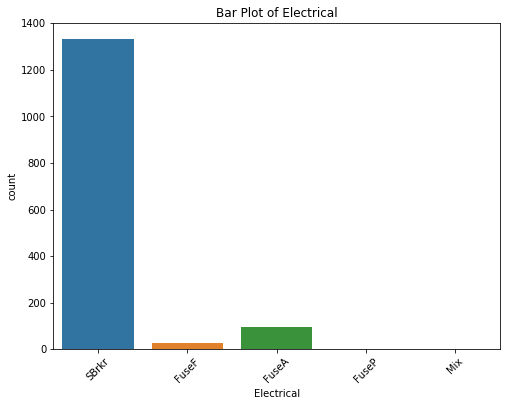

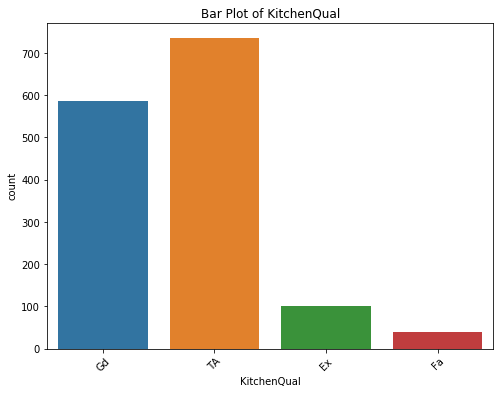

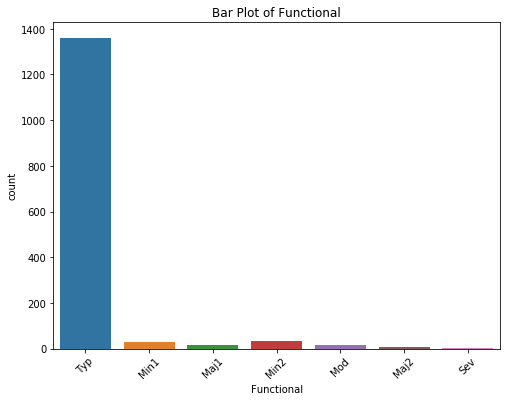

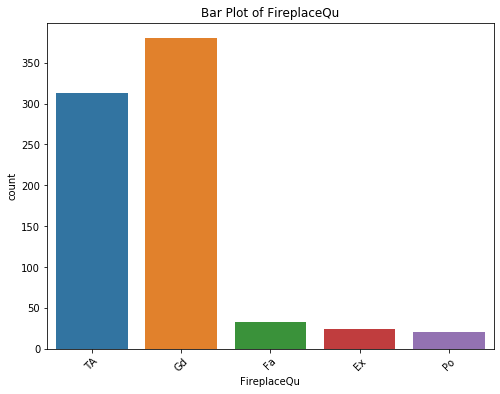

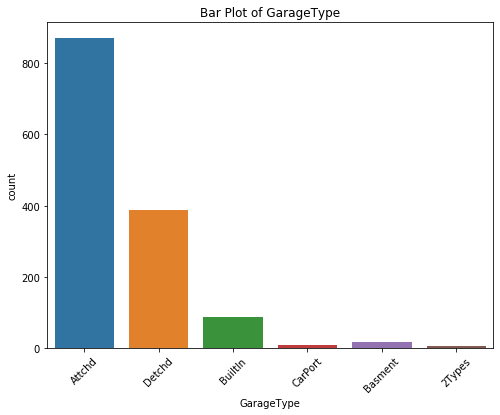

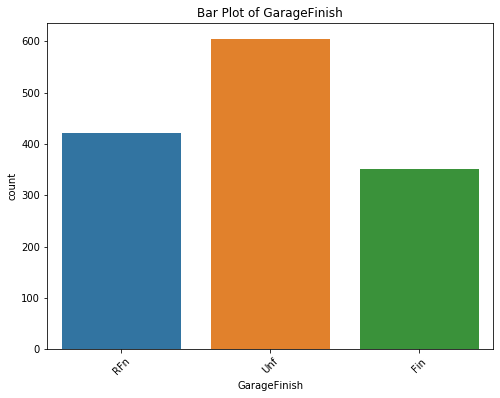

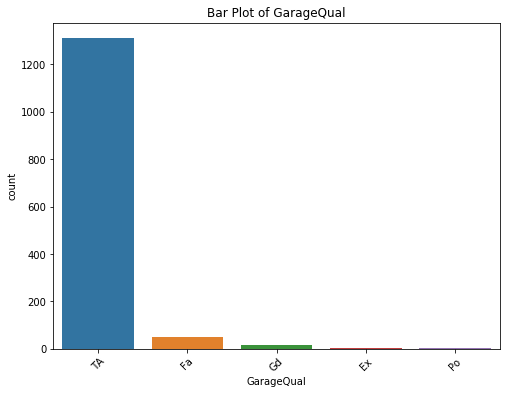

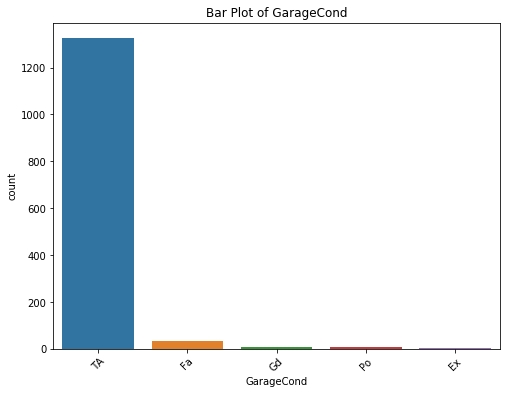

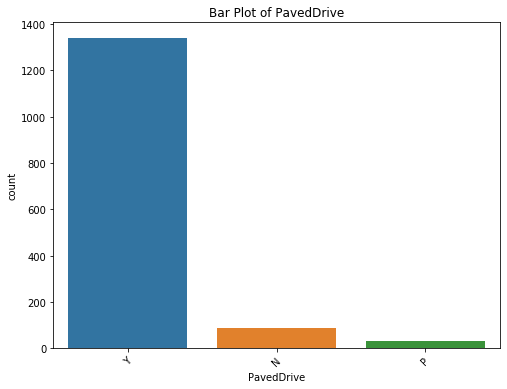

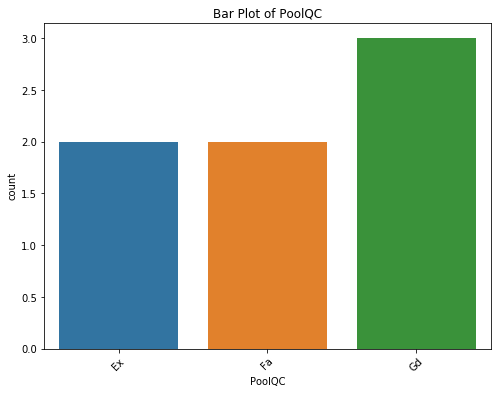

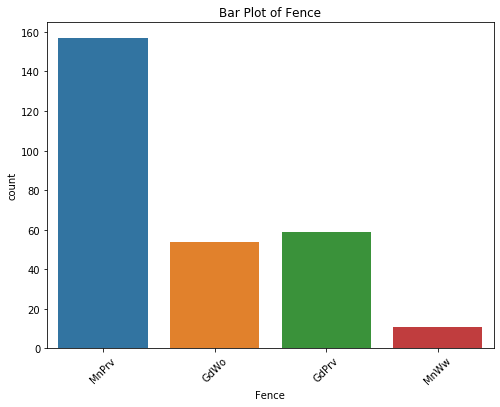

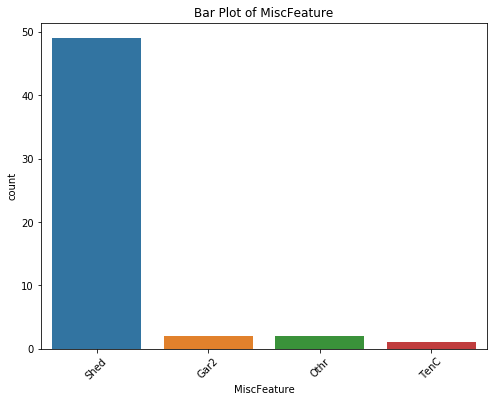

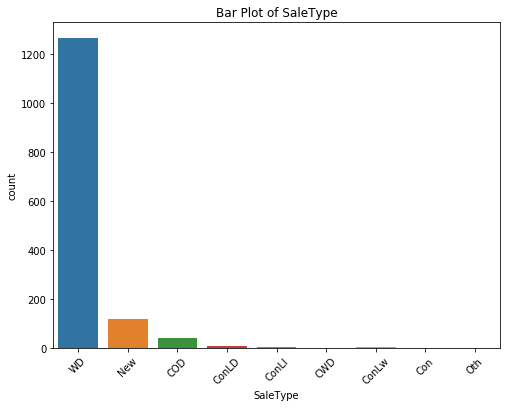

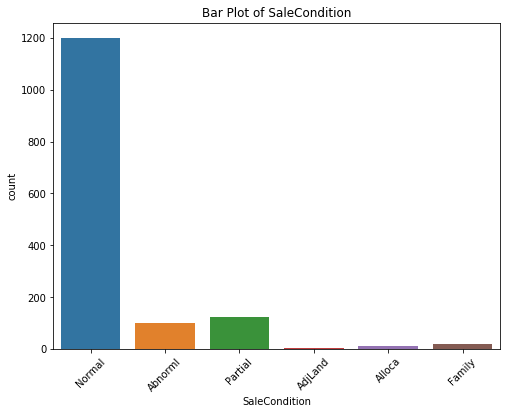

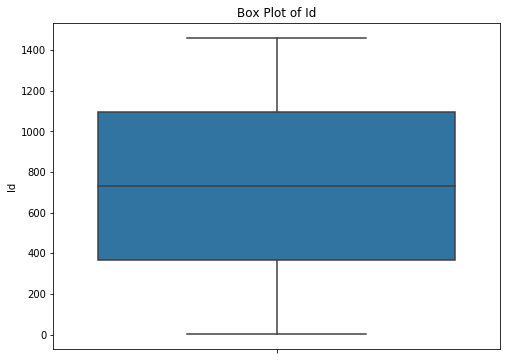

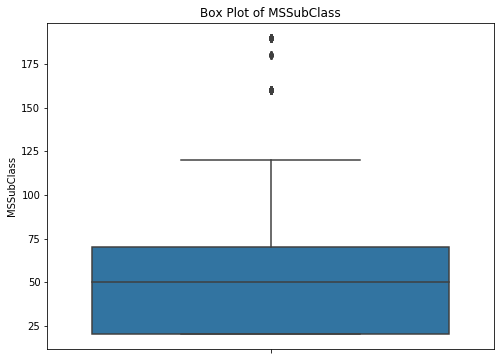

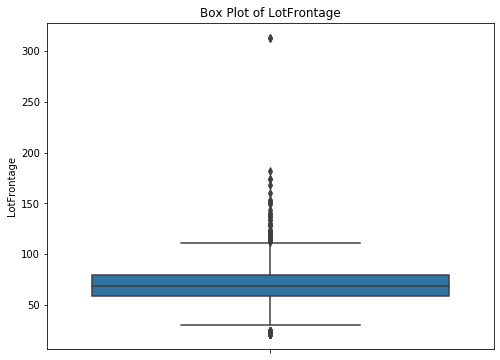

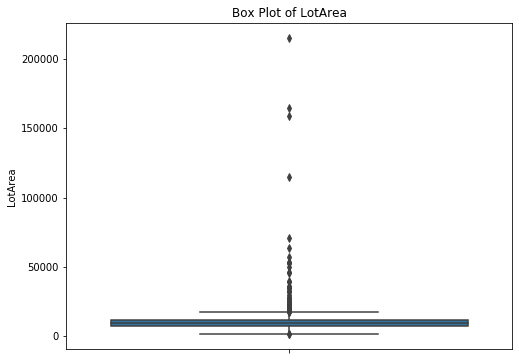

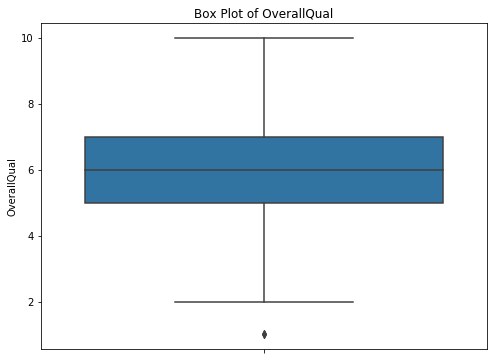

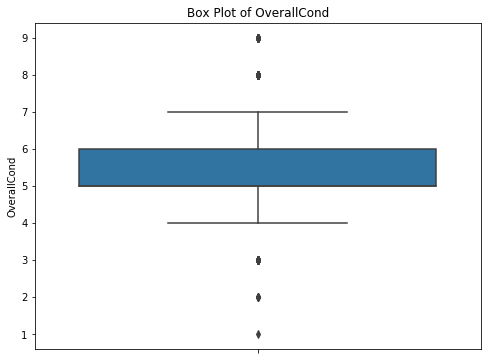

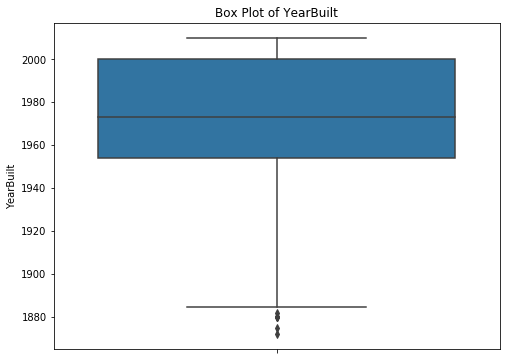

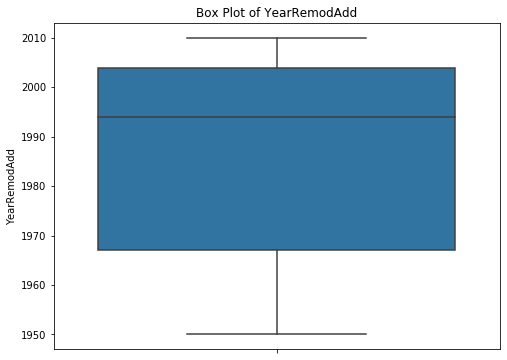

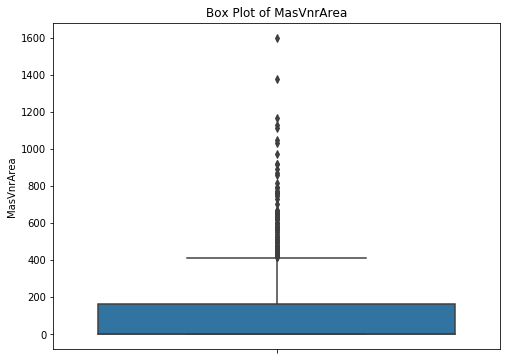

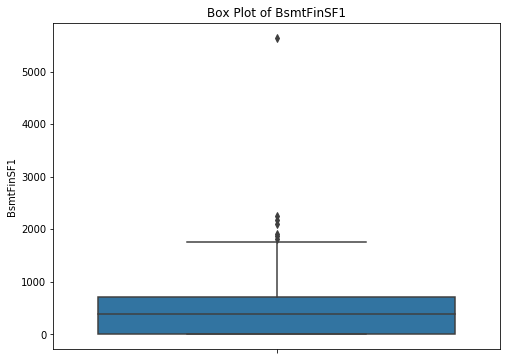

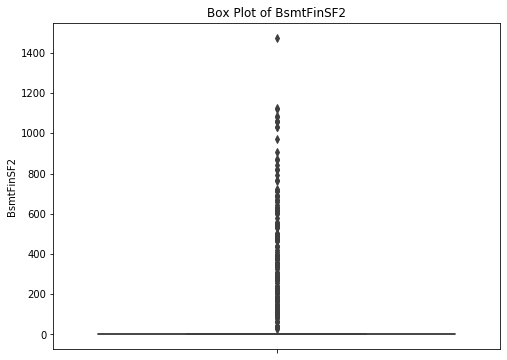

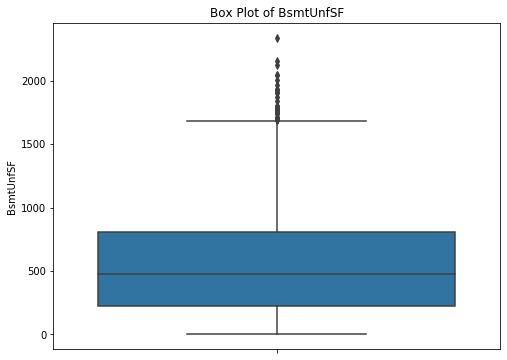

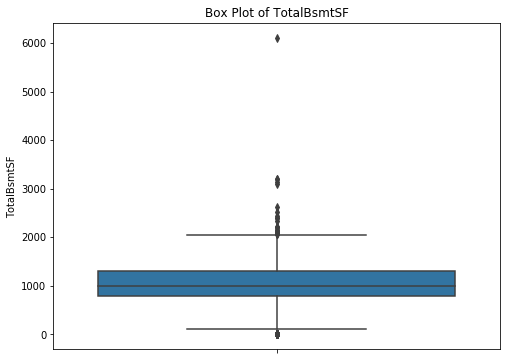

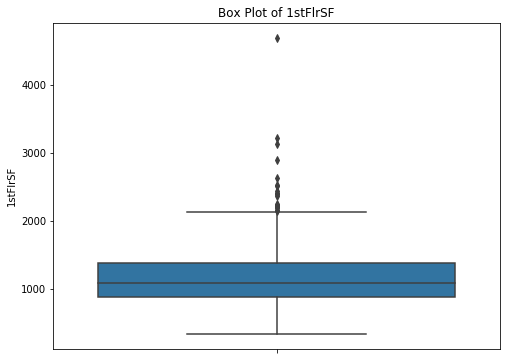

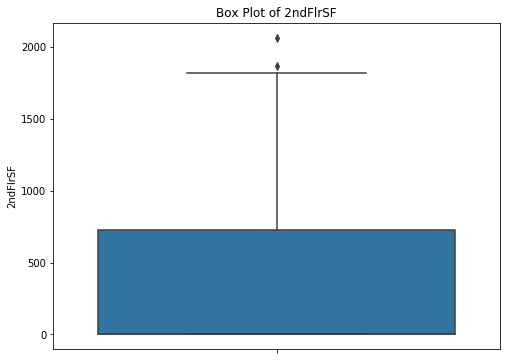

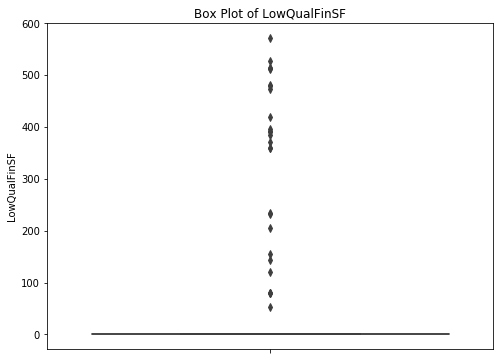

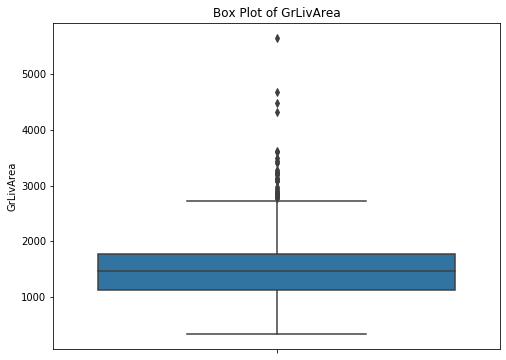

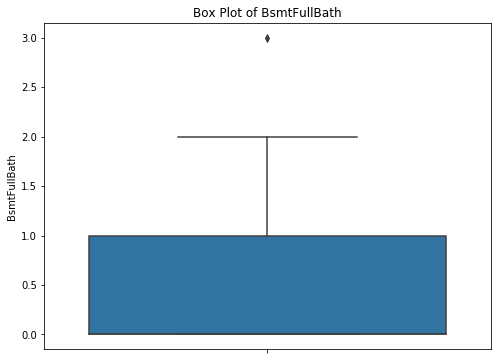

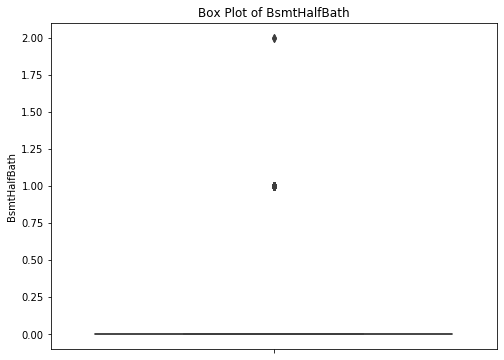

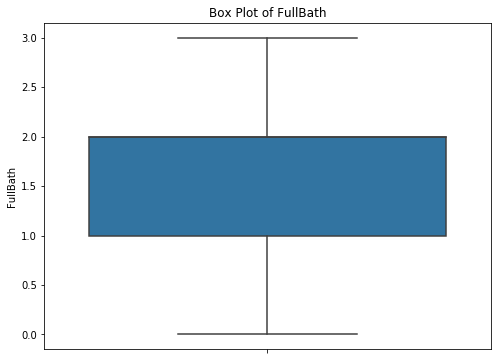

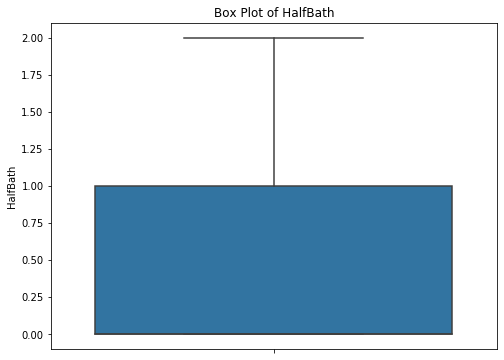

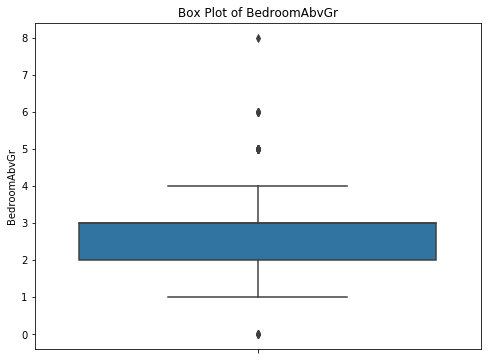

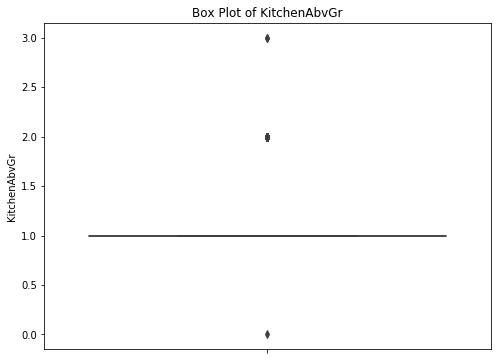

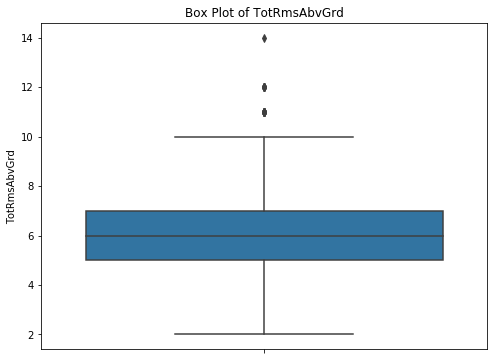

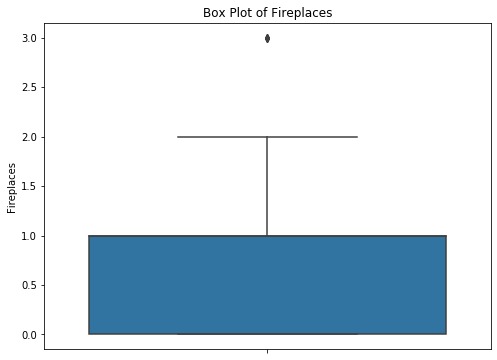

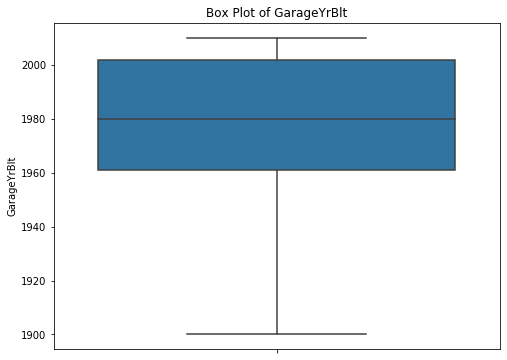

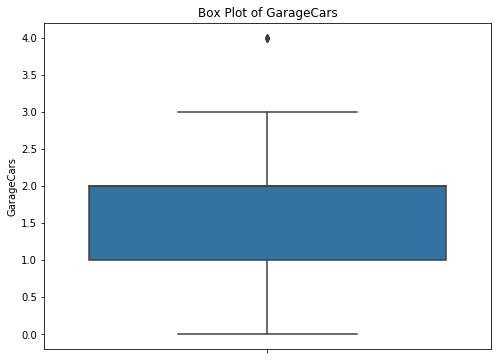

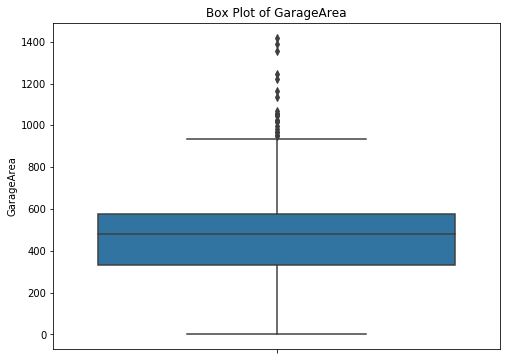

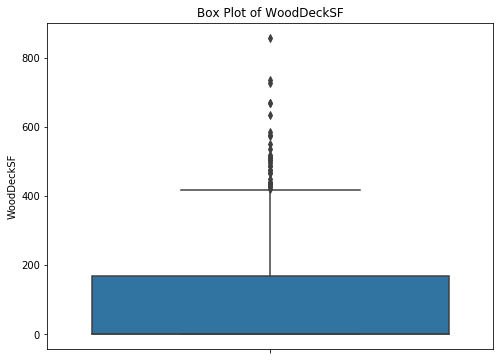

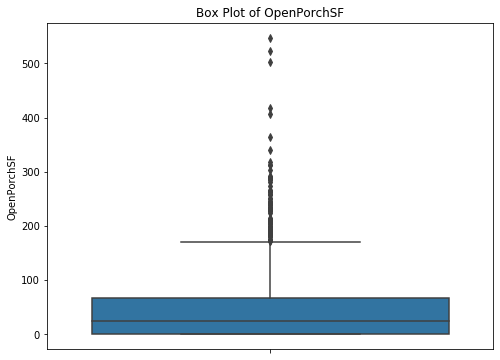

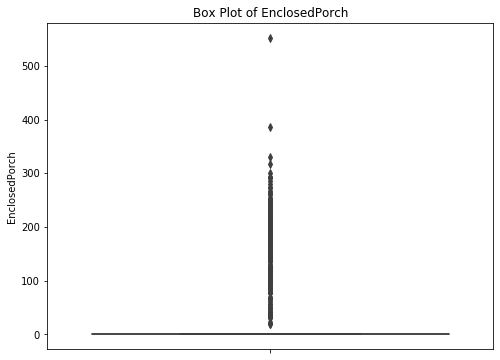

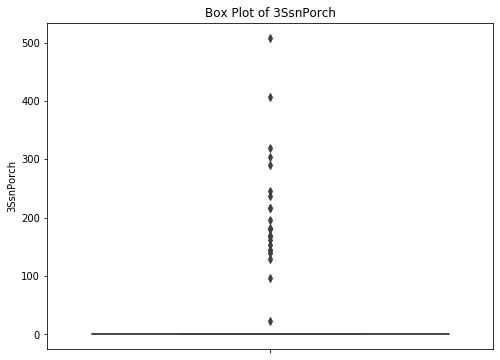

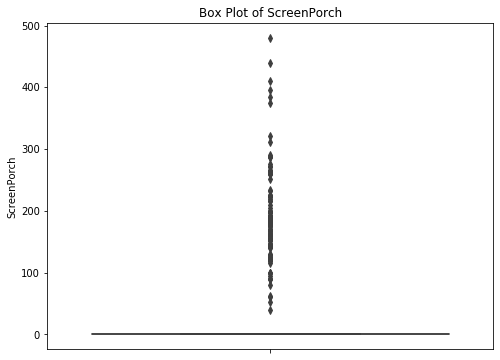

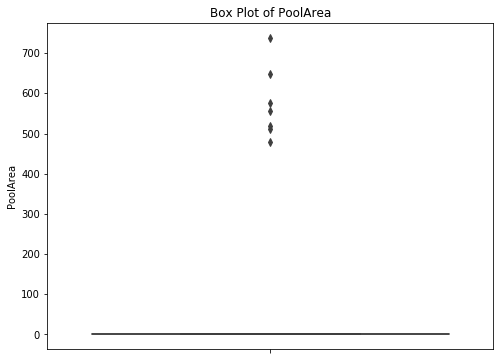

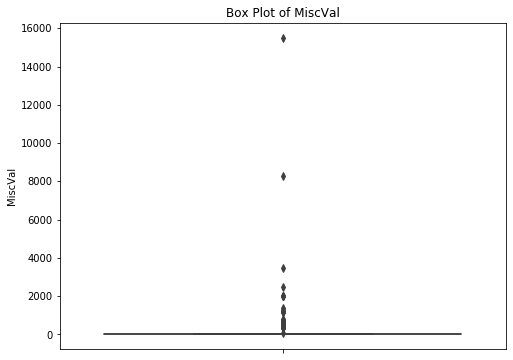

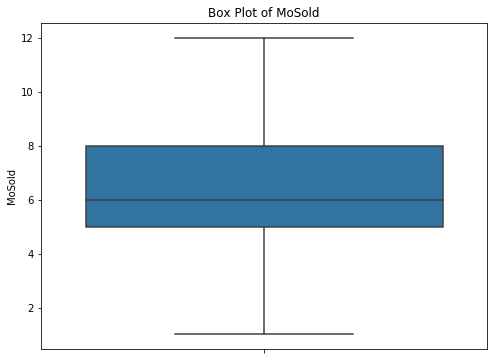

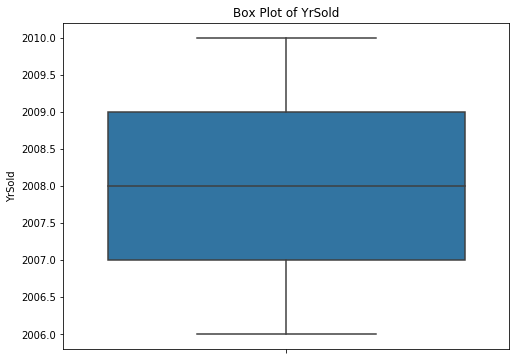

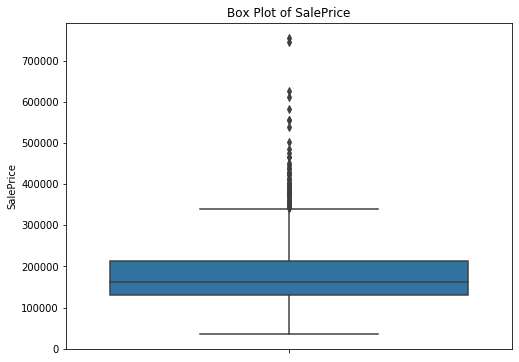

In [32]:
plot_data(df)

In [33]:

def plot_correlation_heatmap(data):
    
    '''numeric variables correlation heatmap'''
    
    numeric_data = data.select_dtypes(include=['float64', 'int64'])
    correlation_matrix = numeric_data.corr()

    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title("Correlation Heatmap of Numeric Variables")
    plt.show()

# Example usage:
# Assuming 'data' is your DataFrame
# plot_correlation_heatmap(data)


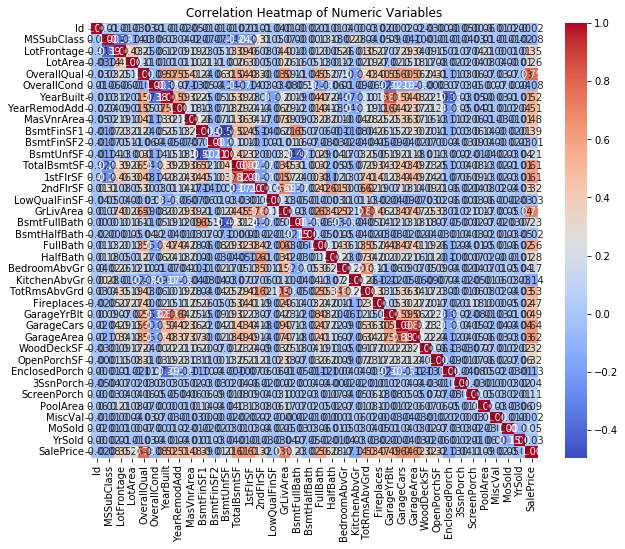

In [34]:
plot_correlation_heatmap(df)

In [38]:

def high_correlation_variables(data, threshold=0.7):
    
    '''return pairs of variables with correlation coefficients greater than threshold'''
    
    numeric_data = data.select_dtypes(include=['float64', 'int64'])
    correlation_matrix = numeric_data.corr()
    
    correlated_pairs = []
    for i in range(len(correlation_matrix.columns)):
        for j in range(i+1, len(correlation_matrix.columns)):
            if abs(correlation_matrix.iloc[i, j]) > threshold:
                correlated_pairs.append((correlation_matrix.columns[i], correlation_matrix.columns[j], correlation_matrix.iloc[i,j]))
                
    correlated_df = pd.DataFrame(correlated_pairs, columns=['Variable 1', 'Variable 2', 'Correlation'])
    return correlated_df

# Example usage:
# Assuming 'data' is your DataFrame
# correlated_variables = high_correlation_variables(data)


In [39]:
corr_df = high_correlation_variables(df)

In [40]:
corr_df

,Variable 1,Variable 2,Correlation
0,OverallQual,SalePrice,0.790982
1,YearBuilt,GarageYrBlt,0.825667
2,TotalBsmtSF,1stFlrSF,0.819530
3,GrLivArea,TotRmsAbvGrd,0.825489
4,GrLivArea,SalePrice,0.708624
5,GarageCars,GarageArea,0.882475


## Pre-process data

### Data cleaning

#### Handling missing values

In [243]:

def drop_missing(data, threshold=0.6):
    
    '''drop columns with threshold and above missing values'''
    
    columns_to_drop = data.columns[data.isnull().mean() > threshold]
    data_dropped = data.drop(columns=columns_to_drop)
    
    return data_dropped

In [91]:
df_dropped = drop_missing(df)

In [92]:
df_dropped.shape


(1460, 77)

In [93]:

def impute_missing(data):
    df = data.copy()
    # Identify missing values
    numeric_columns = df.select_dtypes(include=['number']).columns
    nominal_columns = df.select_dtypes(include=['object']).columns

    # Impute numeric data
    df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].mean())

    # Impute nominal data
    for col in nominal_columns:
        mode_value = df[col].mode()[0]
        df[col] = df[col].fillna(mode_value)

    return df


In [94]:
df_imputed = impute_missing(df_dropped)

### Handling nominal value

In [136]:
# Code ordinal value

def ord_coding(data):
    
    '''Mapping of nominal values to their encoded values'''
    
    new_data = data.copy()
    nominal_encoding = {
        'Ex': 5,
        'Gd': 4,
        'TA': 3,
        'Fa': 2,
        'Po': 1,
        'NA': 0  
    }

    # Apply the encoding to each eligible column
    for col in new_data.select_dtypes(include=['object']).columns:
        unique_values = new_data[col].unique()
        if set(unique_values) == {'Ex', 'Gd', 'TA', 'Fa', 'Po'} or set(unique_values) == {'Ex', 'Gd', 'TA', 'Fa', 'Po', 'NA'}:
            new_data[col] = new_data[col].map(nominal_encoding)
    
    return new_data

In [171]:
df_coded = ord_coding(df_imputed)

In [172]:
nominal_encoding = {
        'Ex': 5,
        'Gd': 4,
        'TA': 3,
        'Fa': 2,
        'Po': 1,
        'NA': 0  
    }

cols = ['ExterQual', 'BsmtQual', 'BsmtCond', 'KitchenQual']

for col in cols:
    
    df_coded[col] = df_coded[col].map(nominal_encoding)

### Hand encoding some ordinal data

In [173]:
# BsmtExposure

BsmtExposure_encoding = {
        
        'Gd': 4,
        'AV': 3,
        'Mn': 2,
        'No': 1,
        'NA': 0  
    }

df_coded['BsmtExposure'] = df_coded['BsmtExposure'].map(BsmtExposure_encoding)


In [174]:
BsmtFinType1_encoding = {
        
       'GLQ': 6, 
       'ALQ': 5,
       'BLQ': 4,
       'Rec': 3,
       'LwQ': 2,
       'Unf': 1,
       'NA': 0
    }

df_coded['BsmtFinType1'] = df_coded['BsmtFinType1'].map(BsmtFinType1_encoding)
df_coded['BsmtFinType2'] = df_coded['BsmtFinType2'].map(BsmtFinType1_encoding)

In [176]:
# CentralAir

CentralAir_encoding = {
       'N': 0,
        'Y': 1
        
    }

df_coded['CentralAir'] = df_coded['CentralAir'].map(CentralAir_encoding)

In [178]:
# GarageFinish

GarageFinish_encoding = {
        
        'Fin': 3,
        'RFn': 2,
        'Unf': 1,
        
        'NA': 0  
    }

df_coded['GarageFinish'] = df_coded['GarageFinish'].map(GarageFinish_encoding)

In [179]:
# PavedDrive

PavedDrive_encoding = {
        
        'Y': 3,
        'P': 2,
        'N': 1
         
    }

df_coded['PavedDrive'] = df_coded['PavedDrive'].map(PavedDrive_encoding)

In [197]:

def group_minor_categories(column):
    '''group categories with less than 1% of data into "Other"'''
    
    freq = column.value_counts(normalize=True)
    minor_cats = freq[freq < 0.01].index
    column[column.isin(minor_cats)] = "Other"


In [198]:
df_grouped = df_coded.copy()

nominal_cols = df_grouped.select_dtypes(include=['object']).columns

for col in nominal_cols:
    group_minor_categories(df_grouped[col])

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


### Target coding categorical variables

In [210]:
GroupDFPath = "./groupdf.ftr";

df_grouped.to_feather(GroupDFPath)

In [ ]:
# df_grouped = pd.read_feather(GroupDFPath, columns=None, use_threads=True)

In [211]:

from sklearn.preprocessing import LabelEncoder

# Assuming df_grouped is your DataFrame

def target_encode(df, categorical_col, target_col):
    le = LabelEncoder()
    df[categorical_col] = le.fit_transform(df[categorical_col])
    
    target_means = df.groupby(categorical_col)[target_col].mean()
    df[categorical_col] = df[categorical_col].map(target_means)
    
    return df

target_col = 'SalePrice'
categorical_cols = df_grouped.select_dtypes(include=['object']).columns.tolist()

df_grouped_encoded = df_grouped.copy()
for col in categorical_cols:
    df_grouped_encoded = target_encode(df_grouped_encoded, col, target_col)


In [95]:
# # Split train and test data set

# from sklearn.model_selection import train_test_split

# def split_train(data, target_name):
#     y = data[target_name]
#     X = data.drop(columns=[target_name])

# # Assuming 'X' is your feature matrix and 'y' is your target variable
#     X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)
    
#     return X_train, X_test, y_train, y_test

## Modeling

In [ ]:
# Based model --- mean sale price

mean_price = df_dropped['SalePrice'].mean()
base_pred = np.array([mean_price] * len(df_dropped['SalePrice']))

from sklearn.metrics import mean_squared_error
mse_base = mean_squared_error(df_dropped['SalePrice'].to_numpy(), base_pred)


In [225]:
rmse_base = np.sqrt(mse_base)
print(f'Base model root mean squred error is: {rmse_base}')

Base model root mean squred error is: 79415.29188606751


In [216]:
mode_value = df_grouped_encoded['BsmtExposure'].mode()[0]
df_grouped_encoded['BsmtExposure'].fillna(mode_value, inplace=True)

### Linear regression

In [221]:

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
#from sklearn.metrics import mean_squared_error

# Drop the "Id" column
#train_ID = df_grouped_encoded['Id']
#df_grouped_encoded = df_grouped_encoded.drop(columns=['Id'])

X = df_grouped_encoded.drop(columns=['SalePrice'])
y = df_grouped_encoded['SalePrice']




Linear Regression Mean Squared Error: 857317304.3194197


In [260]:
# Initialize and train the linear regression model
model1 = LinearRegression()
model1.fit(X, y)

# Predict on the testing set
y_pred1 = model1.predict(X)

# Calculate the mean squared error
rmse_lr = np.sqrt(mean_squared_error(y, y_pred1))
print("Linear Regression Mean Squared Error:", rmse_lr)

Linear Regression Mean Squared Error: 29279.9812896016


### Random forest regression

In [261]:
from sklearn.ensemble import RandomForestRegressor

# Initialize and train the Random Forest Regressor
model2 = RandomForestRegressor(random_state=0)
model2.fit(X, y)

# Predict on the testing set
y_pred2 = model2.predict(X)

# Calculate the mean squared error
mse2 = mean_squared_error(y, y_pred2)

# Calculate the root mean squared error
rmse_rf = np.sqrt(mse2)
print("Random forest Root Mean Squared Error:", rmse_rf)


Random forest Root Mean Squared Error: 10581.904615097255


In [289]:
from xgboost import XGBRegressor


# Initialize and train the XGBoost Regressor
model3 = XGBRegressor(random_state=0)
model3.fit(X, y)

# Predict on the testing set
y_pred3 = model3.predict(X)

# Calculate the mean squared error
mse3 = mean_squared_error(y, y_pred3)

# Calculate the root mean squared error
rmse_XGB = np.sqrt(mse3)
print("Root Mean Squared Error:", rmse_XGB)


Root Mean Squared Error: 1619.3510793432456


In [230]:
from sklearn.ensemble import ExtraTreesRegressor


# Initialize and train the Extra Trees Regressor
model4 = ExtraTreesRegressor(random_state=42)
model4.fit(X, y)

# Predict on the testing set
y_pred4 = model4.predict(X)

# Calculate the mean squared error
mse4 = mean_squared_error(y, y_pred4)

# Calculate the root mean squared error
rmse_XTree = np.sqrt(mse4)
print("Extra Tree Root Mean Squared Error:", rmse_XTree)

Extra Tree Root Mean Squared Error: 0.0


In [231]:
from sklearn.ensemble import AdaBoostRegressor

# Initialize and train the AdaBoost Regressor
model5 = AdaBoostRegressor(random_state=42)
model5.fit(X, y)

# Predict on the testing set
y_pred5 = model5.predict(X)

# Calculate the mean squared error
mse5 = mean_squared_error(y, y_pred5)

# Calculate the root mean squared error
rmse_Ada = np.sqrt(mse5)
print("Root Mean Squared Error:", rmse_Ada)

Root Mean Squared Error: 27998.497743706626


In [292]:
from sklearn.ensemble import GradientBoostingRegressor

# Initialize and train the Gradient Boosting Regressor
model6 = GradientBoostingRegressor(random_state=42)
model6.fit(X, y)

# Predict on the testing set
y_pred6 = model6.predict(X)

# Calculate the mean squared error
mse6 = mean_squared_error(y, y_pred6)

# Calculate the root mean squared error
rmse_GB = np.sqrt(mse6)
print("Gradient Boost Root Mean Squared Error:", rmse_GB)

Gradient Boost Root Mean Squared Error: 14345.86779099297


# Test

In [235]:
test_df = pd.read_csv('test.csv')

In [242]:
test_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [244]:
test_dropped = drop_missing(test_df)

In [245]:
test_dropped.shape

(1459, 76)

In [246]:
test_imputed = impute_missing(test_dropped)

In [247]:
test_coded = ord_coding(test_imputed)

In [248]:
nominal_encoding = {
        'Ex': 5,
        'Gd': 4,
        'TA': 3,
        'Fa': 2,
        'Po': 1,
        'NA': 0  
    }

cols = ['ExterQual', 'BsmtQual', 'BsmtCond', 'KitchenQual']

for col in cols:
    
    test_coded[col] = test_coded[col].map(nominal_encoding)

In [252]:
test_coded.select_dtypes(include=['object']).columns

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation', 'Heating', 'Electrical', 'Functional', 'GarageType', 'GarageQual', 'SaleType', 'SaleCondition'], dtype='object')

In [251]:
test_coded['BsmtExposure'] = test_coded['BsmtExposure'].map(BsmtExposure_encoding)

test_coded['BsmtFinType1'] =test_coded['BsmtFinType1'].map(BsmtFinType1_encoding)
test_coded['BsmtFinType2'] = test_coded['BsmtFinType2'].map(BsmtFinType1_encoding)

test_coded['CentralAir'] = test_coded['CentralAir'].map(CentralAir_encoding)
test_coded['GarageFinish'] = test_coded['GarageFinish'].map(GarageFinish_encoding)

test_coded['PavedDrive'] = test_coded['PavedDrive'].map(PavedDrive_encoding)

In [253]:
test_grouped = test_coded.copy()

nominal_cols = test_grouped.select_dtypes(include=['object']).columns

for col in nominal_cols:
    group_minor_categories(test_grouped[col])

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [257]:
mode_value_test = test_grouped_encoded['BsmtExposure'].mode()[0]
test_grouped_encoded['BsmtExposure'].fillna(mode_value_test, inplace=True)

In [269]:
target_col = 'OverallQual'
categorical_cols = test_grouped_encoded.select_dtypes(include=['object']).columns.tolist()

#test_grouped_encoded = df_grouped.copy()
for col in categorical_cols:
    test_grouped_encoded = target_encode(test_grouped_encoded, col, target_col)

In [276]:
test_ID = test_grouped_encoded['Id']
test_grouped_encoded.drop(['Id'], axis=1, inplace=True)

In [283]:
rf_pred = model2.predict(test_grouped_encoded)

In [285]:
type(rf_pred)

numpy.ndarray

In [286]:
type(test_ID)

pandas.core.series.Series

In [298]:
rf_df = pd.DataFrame({'Id': test_ID, 'SalePrice': rf_pred})
rf_df.to_csv('RF.csv', index=False)

In [290]:
XGB_pred = model3.predict(test_grouped_encoded)

In [299]:
XGB_df = pd.DataFrame({'Id': test_ID, 'SalePrice': XGB_pred})
XGB_df.to_csv('XGB.csv', index=False)

In [293]:
GB_pred = model6.predict(test_grouped_encoded)

In [300]:
GB_df = pd.DataFrame({'Id': test_ID, 'SalePrice': GB_pred})
GB_df.to_csv('GB.csv', index=False)

In [301]:
Ada_pred = model5.predict(test_grouped_encoded)

In [302]:
Ada_df = pd.DataFrame({'Id': test_ID, 'SalePrice': Ada_pred})
Ada_df.to_csv('Ada.csv', index=False)

In [303]:
linear_pred = model1.predict(test_grouped_encoded)

In [304]:
linear_df = pd.DataFrame({'Id': test_ID, 'SalePrice': linear_pred})
linear_df.to_csv('linear.csv', index=False)

In [329]:
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.regularizers import l2


# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X)
X_test_scaled = scaler.transform(test_grouped_encoded)

# assert X_train_scaled.shape[1] == X_test_scaled.shape[1], "Number of features must match"

# Initialize the neural network model
model7 = Sequential()

# Add input layer and first hidden layer
model7.add(Dense(units=64, activation='relu', input_dim=X_train_scaled.shape[1], kernel_regularizer=l2(0.01)))

# Add second hidden layer
model7.add(Dense(units=32, activation='relu',kernel_regularizer=l2(0.01)))

# Add third hidden layer
model7.add(Dense(units=16, activation='relu',kernel_regularizer=l2(0.01)))

model7.add(Dense(units=8, activation='relu', kernel_regularizer=l2(0.01)))

# Add output layer
model7.add(Dense(units=1, activation='linear'))

# Compile the model
model7.compile(loss='mean_squared_error', optimizer='adam')

# Train the model
model7.fit(X_train_scaled, y, epochs=100, batch_size=64, verbose=0)

# Evaluate
# Evaluate the model on the testing set
y_pred7 = model7.predict(X_test_scaled)

# Calculate the root mean squared error
# rmse7 = np.sqrt(np.mean(np.square(y - y_pred7)))
# print("Root Mean Squared Error:", rmse7)

46/46 [==============================] - 0s 2ms/step


In [330]:
mlf_df = pd.DataFrame({'Id': test_ID, 'SalePrice': y_pred7.flatten()})
mlf_df.to_csv('mlf.csv', index=False)

In [323]:
y_pred7.flatten().shape

(1459,)